# <span style="color:blue">**Der Aktien-Finder**</span> <br>

Hierbei werden Aktien anhand einer von **Susan Levermann** entwickelten Methode nach unterschiedlichen KPIs bewertet und bepunktet. Frau Levermann hat dieses Bewertungsmodell in ihrem Buch _Der entspannte Weg zum Reichtum_ literarisch beschrieben.<br>

Wir betrachten in der folgenden Applikation nur die deutschen Aktienindizes, welche nun wie folgt lauten: <br>

1. <span style="color:blue">**DAX**</span>
2. <span style="color:black">**TecDax**</span>
3. <span style="color:red">**MDAX**</span>
<br>

Die __key performance indicators__ (kurz: __KPI__) von Frau Levermann umfassen 13 Kennzahlen. 
Wir beschränken uns zunächst auf folgende vier: <br>

1. Kurs heute gegenüber Kurs von vor 6 Monaten
2. Kurs heute gegenüber Kurs von vor einem Jahr
3. Kurs-Gewinn-Verhältnis (KGV) aktuell
4. Kurs-Gewinn-Verhältnis (KGV) 5 Jahre
<br>

Für jedes dieser Kriterien gibt es folgende mögliche Punktevergaben **+1** ; **0** oder **-1** .
Die Gesamtpunktzahl ergibt den ***LEVERMAN-SCORE***.
Besitzt dieser Score mindestens 4 Punkte sollte die Aktie <span style="color:green"> ***gekauft*** </span> werden (Large Caps).
Bei Small- & Mid Caps sollten 7 Punkte beachtet werden, da kleine Unternehmen größeren Risiken ausgesetzt sind.



## Importieren gängiger APIs zum Erstellen des Dashboardes

In [167]:
# Zeitfenster definieren

from datetime import date    

# Beginn des Zeitfenster zur Ermittlung der Kennzahlen HEUTE vor einem Jahr
start = (datetime.date.today() - datetime.timedelta(395)).isoformat()

# Ende des Zeitfenster stellt der heutige Tag dar. ^^
end = date.today().isoformat()

In [168]:
# Benötigte API laden

import os
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import yfinance as yf
from pandas_datareader import data as pdr 
yf.pdr_override()

In [169]:
# linienstaerke definieren

paper_rc = {'lines.linewidth': 0.9, 'lines.markersize': 10}
sns.set_context('paper', rc = paper_rc)

## Datenbezug der Indizes DAX, TecDAX, MDAX erstellen

### Aktien von DAX laden

In [170]:

# DAX Chart vom letzten Jahr laden.

dax_m = pdr.get_data_yahoo("^GDAXI", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


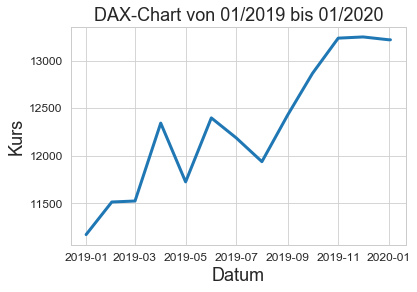

In [178]:

# DAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(dax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('DAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


In [83]:

# Über den Yahoo finance API mit den oben definierten Startwerten einlesen.

adidas = pdr.get_data_yahoo('ADS.DE', start=start, end=end, interval= '1d')
bmw = pdr.get_data_yahoo('BMW.DE', start=start, end=end, interval= '1d')
heise = pdr.get_data_yahoo('HEI.DE', start=start, end=end, interval= '1d')
ifx = pdr.get_data_yahoo('IFX.DE', start=start, end=end, interval= '1d')
cov = pdr.get_data_yahoo('1COV.DE', start=start, end=end, interval= '1d')
fme = pdr.get_data_yahoo('FME.DE', start=start, end=end, interval= '1d')
fre = pdr.get_data_yahoo('FRE.DE', start=start, end=end, interval= '1d')
sap = pdr.get_data_yahoo('SAP.DE', start=start, end=end, interval= '1d')
dai = pdr.get_data_yahoo('DAI.DE', start=start, end=end, interval= '1d')
muv2 = pdr.get_data_yahoo('MUV2.DE', start=start, end=end, interval= '1d')
vow3 = pdr.get_data_yahoo('VOW3.DE', start=start, end=end, interval= '1d')
alv = pdr.get_data_yahoo('ALV.DE', start=start, end=end, interval= '1d')
bas = pdr.get_data_yahoo('BAS.DE', start=start, end=end, interval= '1d')
lin = pdr.get_data_yahoo('LIN.DE', start=start, end=end, interval= '1d')
bayn = pdr.get_data_yahoo('BAYN.DE', start=start, end=end, interval= '1d')
dpw = pdr.get_data_yahoo('DPW.DE', start=start, end=end, interval= '1d')
dte = pdr.get_data_yahoo('DTE.DE', start=start, end=end, interval= '1d')
con = pdr.get_data_yahoo('CON.DE', start=start, end=end, interval= '1d')
vna = pdr.get_data_yahoo('VNA.DE', start=start, end=end, interval= '1d')
bei = pdr.get_data_yahoo('BEI.DE', start=start, end=end, interval= '1d')
mrk = pdr.get_data_yahoo('MRK.DE', start=start, end=end, interval= '1d')
rwe = pdr.get_data_yahoo('RWE.DE', start=start, end=end, interval= '1d')
hen3 = pdr.get_data_yahoo('HEN3.DE', start=start, end=end, interval= '1d')
lha = pdr.get_data_yahoo('LHA.DE', start=start, end=end, interval= '1d')
eon = pdr.get_data_yahoo('EOAN.DE', start=start, end=end, interval= '1d')
sie = pdr.get_data_yahoo('SIE.DE', start=start, end=end, interval= '1d')
dbahn = pdr.get_data_yahoo('DB1.DE', start=start, end=end, interval= '1d')
tka = pdr.get_data_yahoo('TKA.DE', start=start, end=end, interval= '1d')
wdi = pdr.get_data_yahoo('WDI.DE', start=start, end=end, interval= '1d')
arl = pdr.get_data_yahoo('ARL.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Aktien von MDAX laden

In [174]:
# DAX Chart vom letzten Jahr laden.

mdax_m = pdr.get_data_yahoo("^MDAXI", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


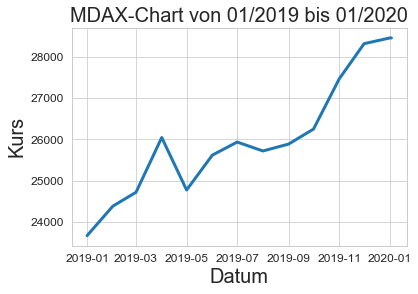

In [177]:
# MDAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(mdax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('MDAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [84]:

# Über den Yahoo finance API mit den oben definierten Startwerten einlesen.

snh = pdr.get_data_yahoo('SNH.DE', start=start, end=end, interval= '1d')
fie = pdr.get_data_yahoo('FIE.DE', start=start, end=end, interval= '1d')
deq = pdr.get_data_yahoo('DEQ.DE', start=start, end=end, interval= '1d')
evd = pdr.get_data_yahoo('EVD.DE', start=start, end=end, interval= '1d')
sha = pdr.get_data_yahoo('SHA.DE', start=start, end=end, interval= '1d')
gil = pdr.get_data_yahoo('GIL.DE', start=start, end=end, interval= '1d')
osr = pdr.get_data_yahoo('OSR.DE', start=start, end=end, interval= '1d')
hnr1 = pdr.get_data_yahoo('HNR1.DE', start=start, end=end, interval= '1d')
jun = pdr.get_data_yahoo('JUN3.DE', start=start, end=end, interval= '1d')
szu = pdr.get_data_yahoo('SZU.DE', start=start, end=end, interval= '1d')
fpe3 = pdr.get_data_yahoo('FPE3.DE', start=start, end=end, interval= '1d')
teg = pdr.get_data_yahoo('TEG.DE', start=start, end=end, interval= '1d')
arl = pdr.get_data_yahoo('ARL.DE', start=start, end=end, interval= '1d')
leg = pdr.get_data_yahoo('LEG.DE', start=start, end=end, interval= '1d')
#saz = pdr.get_data_yahoo('SAZ.DE', start=start, end=end, interval= '1d')
krn = pdr.get_data_yahoo('KRN.DE', start=start, end=end, interval= '1d')
kgx = pdr.get_data_yahoo('KGX.DE', start=start, end=end, interval= '1d')
zal = pdr.get_data_yahoo('ZAL.DE', start=start, end=end, interval= '1d')
rrtl = pdr.get_data_yahoo('RRTL.DE', start=start, end=end, interval= '1d')
boss = pdr.get_data_yahoo('BOSS.DE', start=start, end=end, interval= '1d')
gxi = pdr.get_data_yahoo('GXI.DE', start=start, end=end, interval= '1d')
evk = pdr.get_data_yahoo('EVK.DE', start=start, end=end, interval= '1d')
hot = pdr.get_data_yahoo('HOT.DE', start=start, end=end, interval= '1d')
noej = pdr.get_data_yahoo('NOEJ.DE', start=start, end=end, interval= '1d')
lxs = pdr.get_data_yahoo('LXS.DE', start=start, end=end, interval= '1d')
#meo = pdr.get_data_yahoo('MEO.DE', start=start, end=end, interval= '1d')
rhk = pdr.get_data_yahoo('RHK.DE', start=start, end=end, interval= '1d')
due = pdr.get_data_yahoo('DUE.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Aktien vom TecDax laden

In [179]:
# DAX Chart vom letzten Jahr laden.

tecdax_m = pdr.get_data_yahoo("^TECDAX", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


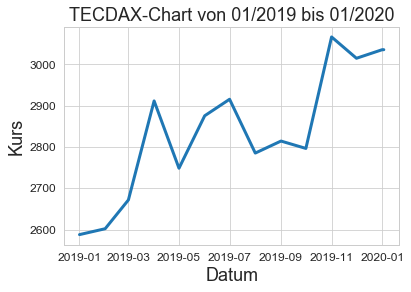

In [180]:
# TECDAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(tecdax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('TECDAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [85]:
#o1bc = pdr.get_data_yahoo('O1BC.DE', start=start, end=end, interval= '1d')
cok = pdr.get_data_yahoo('COK.DE', start=start, end=end, interval= '1d')
drw3 = pdr.get_data_yahoo('DRW3.DE', start=start, end=end, interval= '1d')
cop = pdr.get_data_yahoo('COP.DE', start=start, end=end, interval= '1d')
afx = pdr.get_data_yahoo('AFX.DE', start=start, end=end, interval= '1d')
nem = pdr.get_data_yahoo('NEM.DE', start=start, end=end, interval= '1d')
qia = pdr.get_data_yahoo('QIA.DE', start=start, end=end, interval= '1d')
wdi = pdr.get_data_yahoo('WDI.DE', start=start, end=end, interval= '1d')
o2d = pdr.get_data_yahoo('O2D.DE', start=start, end=end, interval= '1d')
pfv = pdr.get_data_yahoo('PFV.DE', start=start, end=end, interval= '1d')
sbs = pdr.get_data_yahoo('SBS.DE', start=start, end=end, interval= '1d')
srt3 = pdr.get_data_yahoo('SRT3.DE', start=start, end=end, interval= '1d')
s92 = pdr.get_data_yahoo('S92.DE', start=start, end=end, interval= '1d')
fntn = pdr.get_data_yahoo('FNTN.DE', start=start, end=end, interval= '1d')
utdi = pdr.get_data_yahoo('UTDI.DE', start=start, end=end, interval= '1d')
am3d = pdr.get_data_yahoo('AM3D.DE', start=start, end=end, interval= '1d')
mor = pdr.get_data_yahoo('MOR.DE', start=start, end=end, interval= '1d')
sow = pdr.get_data_yahoo('SOW.DE', start=start, end=end, interval= '1d')
jen = pdr.get_data_yahoo('JEN.DE', start=start, end=end, interval= '1d')
gft = pdr.get_data_yahoo('GFT.DE', start=start, end=end, interval= '1d')
ndx1 = pdr.get_data_yahoo('NDX1.DE', start=start, end=end, interval= '1d')
dlg = pdr.get_data_yahoo('DLG.DE', start=start, end=end, interval= '1d')
dri = pdr.get_data_yahoo('DRI.DE', start=start, end=end, interval= '1d')
smhn = pdr.get_data_yahoo('SMHN.DE', start=start, end=end, interval= '1d')
bc8 = pdr.get_data_yahoo('BC8.DE', start=start, end=end, interval= '1d')
aixa = pdr.get_data_yahoo('AIXA.DE', start=start, end=end, interval= '1d')
adv = pdr.get_data_yahoo('ADV.DE', start=start, end=end, interval= '1d')
evt = pdr.get_data_yahoo('EVT.DE', start=start, end=end, interval= '1d')
waf = pdr.get_data_yahoo('WAF.DE', start=start, end=end, interval= '1d')
rib = pdr.get_data_yahoo('RIB.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Aktien gesammelt implementieren 

In [86]:
Adidas = yf.Ticker('ADS.DE')
Allianz = yf.Ticker('ALV.DE')
BASF = yf.Ticker('BSF.DE')
Bayer = yf.Ticker('BAYN.DE')
Beiersdorf = yf.Ticker('BEI.DE')
BMW = yf.Ticker('BMW.DE')
Continental = yf.Ticker('CON.DE')
Covestro = yf.Ticker('1COV.DE')
Daimler = yf.Ticker('DAI.DE')
DeutscheBank = yf.Ticker('DBK.DE')
DeutscheBörse = yf.Ticker('DB1.DE')
DeutschePost = yf.Ticker('DPW.DE')
DeutscheTelekom = yf.Ticker('DTE.DE')
EON = yf.Ticker('EOAN.DE')
FreseniusMedCare = yf.Ticker('FME.DE')
FreseniusSE = yf.Ticker('FRE.DE')
HeidelbergZement = yf.Ticker('HEI.DE')
Henkel = yf.Ticker('HEN3.DE')
Infineon = yf.Ticker('IFX.DE')
Linde = yf.Ticker('LIN.DE')
Lufthansa = yf.Ticker('LHA.DE')
Merck = yf.Ticker('MRK.DE')
MTUAeroEngines = yf.Ticker('MTX.F')
MünchnerRückversicherungsGesellschaft = yf.Ticker('MUV2.DE')
RWE = yf.Ticker('RWE.DE')
SAP = yf.Ticker('SAP.DE')
Siemens = yf.Ticker('SIE.DE')
Volkswagen = yf.Ticker('VOW3.DE')
Venovia = yf.Ticker('VNA.DE')
Wirecard = yf.Ticker('WDI.DE')

In [87]:
print(qia)

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-12-06  31.190001  31.190001  30.590000  30.840000  30.840000   551796
2018-12-07  30.740000  31.580000  30.740000  31.150000  31.150000   592646
2018-12-10  30.709999  31.219999  30.700001  30.719999  30.719999   514539
2018-12-11  30.790001  31.270000  30.790001  30.990000  30.990000   397648
2018-12-12  31.209999  31.370001  30.799999  31.280001  31.280001   413945
2018-12-13  31.120001  31.230000  30.680000  30.799999  30.799999   355728
2018-12-14  30.530001  30.730000  30.389999  30.600000  30.600000   495047
2018-12-17  30.790001  30.790001  30.040001  30.290001  30.290001   414438
2018-12-18  30.190001  30.190001  29.719999  29.840000  29.840000   742560
2018-12-19  29.530001  29.940001  29.530001  29.799999  29.799999   637732
2018-12-20  29.260000  29.700001  29.260000  29.379999  29.379999   581544
2018-12-21  29.219999  30

In [88]:
qia.index

DatetimeIndex(['2018-12-06', '2018-12-07', '2018-12-10', '2018-12-11',
               '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-17',
               '2018-12-18', '2018-12-19',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-27', '2019-12-30',
               '2020-01-02', '2020-01-03'],
              dtype='datetime64[ns]', name='Date', length=267, freq=None)

In [89]:
qia.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [90]:
qiaclose = qia['Adj Close']

In [91]:
print(qiaclose)

Date
2018-12-06    30.840000
2018-12-07    31.150000
2018-12-10    30.719999
2018-12-11    30.990000
2018-12-12    31.280001
2018-12-13    30.799999
2018-12-14    30.600000
2018-12-17    30.290001
2018-12-18    29.840000
2018-12-19    29.799999
2018-12-20    29.379999
2018-12-21    29.480000
2018-12-27    29.240000
2018-12-28    29.680000
2019-01-02    29.760000
2019-01-03    29.760000
2019-01-04    30.700001
2019-01-07    30.760000
2019-01-08    30.840000
2019-01-09    31.219999
2019-01-10    31.400000
2019-01-11    31.430000
2019-01-14    31.250000
2019-01-15    31.709999
2019-01-16    32.000000
2019-01-17    31.990000
2019-01-18    32.450001
2019-01-21    32.250000
2019-01-22    32.459999
2019-01-23    32.520000
                ...    
2019-11-18    36.900002
2019-11-19    37.250000
2019-11-20    36.910000
2019-11-21    37.110001
2019-11-22    37.779999
2019-11-25    37.959999
2019-11-26    38.590000
2019-11-27    38.450001
2019-11-28    38.610001
2019-11-29    38.860001
2019-12-02 

In [100]:
# Nun kann mit den oberen Zeitfenster die Werte des Adj Close direkt geöffnet werden

qiaclose[start]

30.84000015258789

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-06  194.949997  195.949997  192.500000  193.550003  190.954865   
2018-12-07  195.149994  200.800003  195.149994  195.449997  192.829391   
2018-12-10  194.050003  194.800003  192.300003  192.800003  190.214935   
2018-12-11  192.800003  198.399994  192.500000  197.500000  194.851913   
2018-12-12  198.500000  200.300003  197.649994  199.100006  196.430466   
2018-12-13  200.199997  201.100006  198.899994  200.000000  197.318390   
2018-12-14  197.649994  198.600006  194.500000  195.500000  192.878723   
2018-12-17  192.750000  194.000000  185.149994  186.850006  184.344711   
2018-12-18  185.899994  188.699997  183.699997  186.199997  183.703415   
2018-12-19  186.949997  189.050003  186.300003  187.050003  184.542023   
2018-12-20  184.000000  185.300003  182.750000  183.750000  181.286270   
2018-12-21  183.000000  185.550003  17

In [101]:
adidasclose= adidas['Adj Close']